In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
results_folder = '../eval_results_gpt_4_0'

# fewshot 0

In [3]:
record_path = f"{results_folder}/ajgt-fewshot-0-temp-1.0_updated_prompt.jsonl"

In [4]:
with open(record_path, "r") as f:
    events_df = pd.read_json(f, lines=True)

In [5]:
events_df

,spec,run_id,event_id,sample_id,type,data,created_by,created_at,final_report
0,"{'model_name': 'gpt-4-0314', 'model_names': {'...",NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,NaN,2306050249323BILH4IR,0.0,ajgt.test.0,raw_sample,"{'input': [{'role': 'system', 'content': 'Resp...",,2023-06-05 02:49:32.611429+00:00,NaN
2,NaN,2306050249323BILH4IR,1.0,ajgt.test.0,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-05 02:49:34.875537+00:00,NaN
3,NaN,2306050249323BILH4IR,2.0,ajgt.test.0,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-05 02:49:34.875622+00:00,NaN
4,NaN,2306050249323BILH4IR,3.0,ajgt.test.1,raw_sample,"{'input': [{'role': 'system', 'content': 'Resp...",,2023-06-05 02:49:34.876692+00:00,NaN
...,...,...,...,...,...,...,...,...,...
1080,NaN,2306050249323BILH4IR,1078.0,ajgt.test.358,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-05 04:02:46.270339+00:00,NaN
1081,NaN,2306050249323BILH4IR,1079.0,ajgt.test.358,classification,"{'accuracy': True, 'sampled': 'Negative', 'exp...",,2023-06-05 04:02:46.270423+00:00,NaN
1082,NaN,2306050249323BILH4IR,1080.0,ajgt.test.359,raw_sample,"{'input': [{'role': 'system', 'content': 'Resp...",,2023-06-05 04:02:46.272349+00:00,NaN
1083,NaN,2306050249323BILH4IR,1081.0,ajgt.test.359,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-05 04:02:59.709641+00:00,NaN


see how many results that does not contain either positive or negative

In [6]:
classifications = events_df[events_df['type'] == 'classification'].drop_duplicates(subset='sample_id')
classifications

,spec,run_id,event_id,sample_id,type,data,created_by,created_at,final_report
3,NaN,2306050249323BILH4IR,2.0,ajgt.test.0,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-05 02:49:34.875622+00:00,NaN
6,NaN,2306050249323BILH4IR,5.0,ajgt.test.1,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-05 02:49:36.897303+00:00,NaN
9,NaN,2306050249323BILH4IR,8.0,ajgt.test.2,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-05 02:49:38.740578+00:00,NaN
12,NaN,2306050249323BILH4IR,11.0,ajgt.test.3,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-05 02:49:40.994543+00:00,NaN
15,NaN,2306050249323BILH4IR,14.0,ajgt.test.4,classification,"{'accuracy': True, 'sampled': 'Negative', 'exp...",,2023-06-05 02:49:42.429986+00:00,NaN
...,...,...,...,...,...,...,...,...,...
1072,NaN,2306050249323BILH4IR,1070.0,ajgt.test.355,classification,"{'accuracy': False, 'sampled': 'Positive', 'ex...",,2023-06-05 04:02:12.475863+00:00,NaN
1075,NaN,2306050249323BILH4IR,1073.0,ajgt.test.356,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-05 04:02:21.896821+00:00,NaN
1078,NaN,2306050249323BILH4IR,1076.0,ajgt.test.357,classification,"{'accuracy': False, 'sampled': 'Positive', 'ex...",,2023-06-05 04:02:38.282657+00:00,NaN
1081,NaN,2306050249323BILH4IR,1079.0,ajgt.test.358,classification,"{'accuracy': True, 'sampled': 'Negative', 'exp...",,2023-06-05 04:02:46.270423+00:00,NaN


In [7]:
classifications['data'].iloc[0]

{'accuracy': True, 'sampled': 'Positive', 'expected': 'Positive'}

In [8]:
responses = [item['sampled'] for item in classifications['data']]
set(responses),len(responses)

({'Negative', 'Positive'}, 360)

In [9]:
ideals = [item['expected'] for item in classifications['data']]
set(ideals),len(ideals)

({'Negative', 'Positive'}, 360)

draw the confusion matrix

In [10]:
print(classification_report(responses,ideals))

              precision    recall  f1-score   support

    Negative       0.86      0.95      0.90       154
    Positive       0.96      0.89      0.92       206

    accuracy                           0.91       360
   macro avg       0.91      0.92      0.91       360
weighted avg       0.92      0.91      0.91       360



<Axes: >

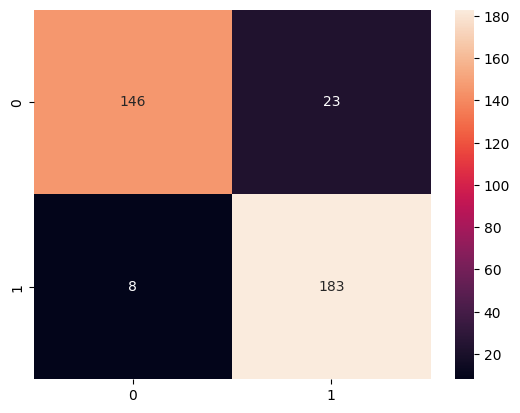

In [11]:
sns.heatmap(confusion_matrix(ideals,responses), annot=True,fmt='g')

# fewshot 3

In [12]:
record_path = f"{results_folder}/ajgt-fewshot-3-temp-1.0.jsonl"

In [13]:
with open(record_path, "r") as f:
    events_df = pd.read_json(f, lines=True)

In [14]:
events_df

,spec,run_id,event_id,sample_id,type,data,created_by,created_at,final_report
0,"{'model_name': 'gpt-4-0314', 'model_names': {'...",NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,NaN,230601132211PEBKPSU3,0.0,ajgt.test.0,raw_sample,"{'input': [{'role': 'system', 'content': 'Resp...",,2023-06-01 13:22:11.949598+00:00,NaN
2,NaN,230601132211PEBKPSU3,1.0,ajgt.test.0,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-01 13:22:13.638879+00:00,NaN
3,NaN,230601132211PEBKPSU3,2.0,ajgt.test.0,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 13:22:13.638904+00:00,NaN
4,NaN,230601132211PEBKPSU3,3.0,ajgt.test.1,raw_sample,"{'input': [{'role': 'system', 'content': 'Resp...",,2023-06-01 13:22:13.639302+00:00,NaN
...,...,...,...,...,...,...,...,...,...
1086,NaN,230601132211PEBKPSU3,1084.0,ajgt.test.358,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-01 14:38:10.333885+00:00,NaN
1087,NaN,230601132211PEBKPSU3,1085.0,ajgt.test.358,classification,"{'accuracy': True, 'sampled': 'Negative', 'exp...",,2023-06-01 14:38:10.333909+00:00,NaN
1088,NaN,230601132211PEBKPSU3,1086.0,ajgt.test.359,raw_sample,"{'input': [{'role': 'system', 'content': 'Resp...",,2023-06-01 14:38:10.342394+00:00,NaN
1089,NaN,230601132211PEBKPSU3,1087.0,ajgt.test.359,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-01 14:38:31.025275+00:00,NaN


see how many results that does not contain either positive or negative

In [15]:
classifications = events_df[events_df['type'] == 'classification'].drop_duplicates(subset='sample_id')
classifications

,spec,run_id,event_id,sample_id,type,data,created_by,created_at,final_report
3,NaN,230601132211PEBKPSU3,2.0,ajgt.test.0,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 13:22:13.638904+00:00,NaN
6,NaN,230601132211PEBKPSU3,5.0,ajgt.test.1,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 13:22:15.514094+00:00,NaN
9,NaN,230601132211PEBKPSU3,8.0,ajgt.test.2,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 13:22:34.515501+00:00,NaN
12,NaN,230601132211PEBKPSU3,11.0,ajgt.test.3,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 13:22:38.323701+00:00,NaN
15,NaN,230601132211PEBKPSU3,14.0,ajgt.test.4,classification,"{'accuracy': True, 'sampled': 'Negative', 'exp...",,2023-06-01 13:22:57.211495+00:00,NaN
...,...,...,...,...,...,...,...,...,...
1078,NaN,230601132211PEBKPSU3,1076.0,ajgt.test.355,classification,"{'accuracy': False, 'sampled': 'Positive', 'ex...",,2023-06-01 14:37:33.308370+00:00,NaN
1081,NaN,230601132211PEBKPSU3,1079.0,ajgt.test.356,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 14:38:06.683307+00:00,NaN
1084,NaN,230601132211PEBKPSU3,1082.0,ajgt.test.357,classification,"{'accuracy': False, 'sampled': 'Positive', 'ex...",,2023-06-01 14:38:09.132789+00:00,NaN
1087,NaN,230601132211PEBKPSU3,1085.0,ajgt.test.358,classification,"{'accuracy': True, 'sampled': 'Negative', 'exp...",,2023-06-01 14:38:10.333909+00:00,NaN


In [16]:
classifications['data'].iloc[0]

{'accuracy': True, 'sampled': 'Positive', 'expected': 'Positive'}

In [17]:
responses = [item['sampled'] for item in classifications['data']]
set(responses),len(responses)

({'Negative', 'Neutral', 'Positive'}, 360)

In [18]:
ideals = [item['expected'] for item in classifications['data']]
set(ideals),len(ideals)

({'Negative', 'Positive'}, 360)

draw the confusion matrix

In [19]:
print(classification_report(responses,ideals))

              precision    recall  f1-score   support

    Negative       0.91      0.96      0.93       160
     Neutral       0.00      0.00      0.00         3
    Positive       0.95      0.92      0.93       197

    accuracy                           0.93       360
   macro avg       0.62      0.63      0.62       360
weighted avg       0.92      0.93      0.92       360



/home/majed.alshaibani/.virtualenvs/evals/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majed.alshaibani/.virtualenvs/evals/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majed.alshaibani/.virtualenvs/evals/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<Axes: >

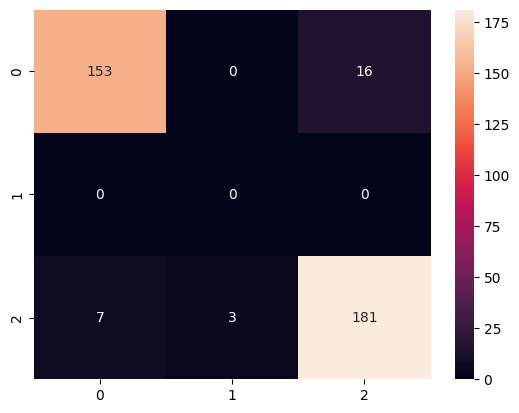

In [20]:
sns.heatmap(confusion_matrix(ideals,responses), annot=True,fmt='g')

# fewshot 5

In [21]:
record_path = f"{results_folder}/ajgt-fewshot-5-temp-1.0.jsonl"

In [22]:
with open(record_path, "r") as f:
    events_df = pd.read_json(f, lines=True)

In [23]:
events_df

,spec,run_id,event_id,sample_id,type,data,created_by,created_at,final_report
0,"{'model_name': 'gpt-4-0314', 'model_names': {'...",NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,NaN,230601143833X6QROM22,0.0,ajgt.test.0,raw_sample,"{'input': [{'role': 'system', 'content': 'Resp...",,2023-06-01 14:38:33.620142+00:00,NaN
2,NaN,230601143833X6QROM22,1.0,ajgt.test.0,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-01 14:38:35.218953+00:00,NaN
3,NaN,230601143833X6QROM22,2.0,ajgt.test.0,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 14:38:35.219027+00:00,NaN
4,NaN,230601143833X6QROM22,3.0,ajgt.test.1,raw_sample,"{'input': [{'role': 'system', 'content': 'Resp...",,2023-06-01 14:38:35.220188+00:00,NaN
...,...,...,...,...,...,...,...,...,...
1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,{'accuracy': 0.9536784741144411}
1102,NaN,230601143833X6QROM22,1100.0,ajgt.test.359,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-01 16:01:07.982435+00:00,NaN
1103,NaN,230601143833X6QROM22,1101.0,ajgt.test.359,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 16:01:07.982473+00:00,NaN
1104,NaN,230601143833X6QROM22,1102.0,ajgt.test.350,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-01 16:01:22.330916+00:00,NaN


see how many results that does not contain either positive or negative

In [24]:
classifications = events_df[events_df['type'] == 'classification'].drop_duplicates(subset='sample_id')
classifications

,spec,run_id,event_id,sample_id,type,data,created_by,created_at,final_report
3,NaN,230601143833X6QROM22,2.0,ajgt.test.0,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 14:38:35.219027+00:00,NaN
6,NaN,230601143833X6QROM22,5.0,ajgt.test.1,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 14:38:49.214172+00:00,NaN
9,NaN,230601143833X6QROM22,8.0,ajgt.test.2,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 14:38:58.170749+00:00,NaN
12,NaN,230601143833X6QROM22,11.0,ajgt.test.3,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 14:39:23.505918+00:00,NaN
15,NaN,230601143833X6QROM22,14.0,ajgt.test.4,classification,"{'accuracy': True, 'sampled': 'Negative', 'exp...",,2023-06-01 14:39:26.278724+00:00,NaN
...,...,...,...,...,...,...,...,...,...
1090,NaN,230601143833X6QROM22,1089.0,ajgt.test.355,classification,"{'accuracy': True, 'sampled': 'Negative', 'exp...",,2023-06-01 16:00:18.523704+00:00,NaN
1093,NaN,230601143833X6QROM22,1092.0,ajgt.test.356,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 16:00:39.262253+00:00,NaN
1096,NaN,230601143833X6QROM22,1095.0,ajgt.test.357,classification,"{'accuracy': False, 'sampled': 'Positive', 'ex...",,2023-06-01 16:00:42.299933+00:00,NaN
1099,NaN,230601143833X6QROM22,1098.0,ajgt.test.358,classification,"{'accuracy': True, 'sampled': 'Negative', 'exp...",,2023-06-01 16:01:06.764227+00:00,NaN


In [25]:
classifications['data'].iloc[0]

{'accuracy': True, 'sampled': 'Positive', 'expected': 'Positive'}

In [26]:
responses = [item['sampled'] for item in classifications['data']]
set(responses),len(responses)

({'Negative', 'Positive'}, 360)

In [27]:
ideals = [item['expected'] for item in classifications['data']]
set(ideals),len(ideals)

({'Negative', 'Positive'}, 360)

draw the confusion matrix

In [28]:
print(classification_report(responses,ideals))

              precision    recall  f1-score   support

    Negative       0.93      0.96      0.95       164
    Positive       0.97      0.94      0.96       196

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



<Axes: >

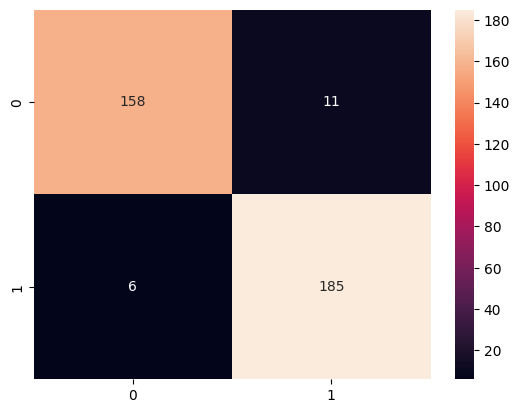

In [29]:
sns.heatmap(confusion_matrix(ideals,responses), annot=True,fmt='g')

# fewshot 10

In [30]:
record_path = f"{results_folder}/ajgt-fewshot-10-temp-1.0.jsonl"

In [31]:
with open(record_path, "r") as f:
    events_df = pd.read_json(f, lines=True)

In [32]:
events_df

,spec,run_id,event_id,sample_id,type,data,created_by,created_at,final_report
0,"{'model_name': 'gpt-4-0314', 'model_names': {'...",NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,NaN,230601160125SOU2FDDE,0.0,ajgt.test.0,raw_sample,"{'input': [{'role': 'system', 'content': 'Resp...",,2023-06-01 16:01:25.272894+00:00,NaN
2,NaN,230601160125SOU2FDDE,1.0,ajgt.test.0,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-01 16:01:31.596988+00:00,NaN
3,NaN,230601160125SOU2FDDE,2.0,ajgt.test.0,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 16:01:31.597059+00:00,NaN
4,NaN,230601160125SOU2FDDE,3.0,ajgt.test.1,raw_sample,"{'input': [{'role': 'system', 'content': 'Resp...",,2023-06-01 16:01:31.597948+00:00,NaN
...,...,...,...,...,...,...,...,...,...
1092,NaN,230601160125SOU2FDDE,1090.0,ajgt.test.359,raw_sample,"{'input': [{'role': 'system', 'content': 'Resp...",,2023-06-01 17:19:22.995488+00:00,NaN
1093,NaN,230601160125SOU2FDDE,1091.0,ajgt.test.359,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-01 17:19:32.608206+00:00,NaN
1094,NaN,230601160125SOU2FDDE,1092.0,ajgt.test.359,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 17:19:32.608257+00:00,NaN
1095,NaN,230601160125SOU2FDDE,1093.0,ajgt.test.349,sampling,"{'prompt': [{'role': 'system', 'content': 'Res...",,2023-06-01 17:20:10.862755+00:00,NaN


see how many results that does not contain either positive or negative

In [33]:
classifications = events_df[events_df['type'] == 'classification'].drop_duplicates(subset='sample_id')
classifications

,spec,run_id,event_id,sample_id,type,data,created_by,created_at,final_report
3,NaN,230601160125SOU2FDDE,2.0,ajgt.test.0,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 16:01:31.597059+00:00,NaN
6,NaN,230601160125SOU2FDDE,5.0,ajgt.test.1,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 16:01:44.873005+00:00,NaN
9,NaN,230601160125SOU2FDDE,8.0,ajgt.test.2,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 16:01:56.281521+00:00,NaN
12,NaN,230601160125SOU2FDDE,11.0,ajgt.test.3,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 16:02:07.298727+00:00,NaN
15,NaN,230601160125SOU2FDDE,14.0,ajgt.test.4,classification,"{'accuracy': True, 'sampled': 'Negative', 'exp...",,2023-06-01 16:02:32.753391+00:00,NaN
...,...,...,...,...,...,...,...,...,...
1082,NaN,230601160125SOU2FDDE,1080.0,ajgt.test.355,classification,"{'accuracy': False, 'sampled': 'Positive', 'ex...",,2023-06-01 17:18:56.549585+00:00,NaN
1085,NaN,230601160125SOU2FDDE,1083.0,ajgt.test.356,classification,"{'accuracy': True, 'sampled': 'Positive', 'exp...",,2023-06-01 17:18:57.742771+00:00,NaN
1088,NaN,230601160125SOU2FDDE,1086.0,ajgt.test.357,classification,"{'accuracy': False, 'sampled': 'Positive', 'ex...",,2023-06-01 17:19:06.911026+00:00,NaN
1091,NaN,230601160125SOU2FDDE,1089.0,ajgt.test.358,classification,"{'accuracy': True, 'sampled': 'Negative', 'exp...",,2023-06-01 17:19:22.994512+00:00,NaN


In [34]:
classifications['data'].iloc[0]

{'accuracy': True, 'sampled': 'Positive', 'expected': 'Positive'}

In [35]:
responses = [item['sampled'] for item in classifications['data']]
set(responses),len(responses)

({'Negative', 'Positive'}, 360)

In [36]:
ideals = [item['expected'] for item in classifications['data']]
set(ideals),len(ideals)

({'Negative', 'Positive'}, 360)

draw the confusion matrix

In [37]:
print(classification_report(responses,ideals))

              precision    recall  f1-score   support

    Negative       0.86      0.97      0.91       149
    Positive       0.98      0.89      0.93       211

    accuracy                           0.92       360
   macro avg       0.92      0.93      0.92       360
weighted avg       0.93      0.92      0.92       360



<Axes: >

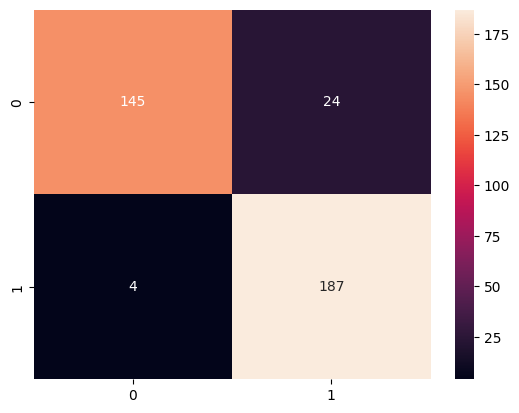

In [38]:
sns.heatmap(confusion_matrix(ideals,responses), annot=True,fmt='g')